In last weeks work we created methods to calculate the values neded to calculate P(A|LH), the probability of drying at age A given that a person is left handed. 

$$
P(A|LH)=\frac{P(LH|A)P(A)}{P(LH)}
$$

We can calculate:
* P(LH|A) is the probability that you are left handed given that you died at age A
* P(A) is the overall prbability of dying at age A, and
* P(LH) is the overall prbability of being left handed

In order to gain value from this calculation it will need to be compared to P(A|RH), the probability of dying at age A given that a person is right-handed.

In [6]:
def P_A_given_lh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're left-handed """
    P_A = death_distribution_data['Both Sexes'][ages_of_death]/death_distribution_data['Both Sexes'].sum()
    P_left = P_lh(death_distribution_data, study_year) # use P_lh function to get probability of left-handedness overall
    P_lh_A = P_lh_given_A(ages_of_death, study_year) # use P_lh_given_A to get probability of left-handedness for a certain age
    return P_lh_A*P_A/P_left

Again in order to gain value from this calculation it is important to compare it to P(A|RH) so we will construct a function to similarly calculate P(A|RH).

In [7]:
def P_A_given_rh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're right-handed """
    P_A = death_distribution_data['Both Sexes'][ages_of_death]/death_distribution_data['Both Sexes'].sum()
    P_right = 1 - P_lh(death_distribution_data, study_year) # either you're left-handed or right-handed, so P_right = 1 - P_left
    P_rh_A = 1 - P_lh_given_A(ages_of_death, study_year) # P_rh_A = 1 - P_lh_A 
    return P_rh_A*P_A/P_right

Using the functions created above we will plot the distributions of death probabilities for ages from 6 to 120 years of age. The most noteable diffrences in distributions is the slight bump in probabilities of death below the age of 60.  

Text(0, 0.5, 'Probability of being age A at death')

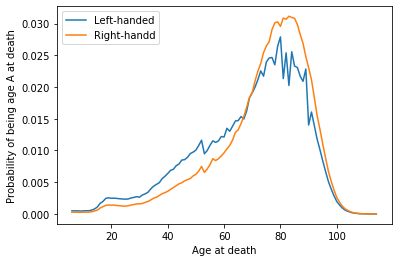

In [8]:
ages = np.arange(6, 115, 1) # make a list of ages of death to plot

# calculate the probability of being left- or right-handed for each 
left_handed_probability = P_A_given_lh(ages, death_distribution_data, study_year = 1990)
right_handed_probability = P_A_given_rh(ages, death_distribution_data, study_year = 1990)

# create a plot of the two probabilities vs. age
fig, ax = plt.subplots() # create figure and axis objects
ax.plot(ages, left_handed_probability, label = "Left-handed")
ax.plot(ages, right_handed_probability, label = "Right-handd")
ax.legend() # add a legend
ax.set_xlabel("Age at death")
ax.set_ylabel(r"Probability of being age A at death")

To evaluate our results against the original 1991 study, which concluded that left-handed persons lived an average of 9 years. This comparison can be con by calculating the mean of of th probability distributions.

Average age of left-handed people at $death=\sum AP(A|LH)$

Average age of right-handed people at $death=\sum AP(A|RH)$


In [9]:
# calculate average ages for left-handed and right-handed groups
# use np.array so that two arrays can be multiplied
average_lh_age =  np.nansum(ages*np.array(left_handed_probability))
average_rh_age =  np.nansum(ages*np.array(right_handed_probability))

# print the average ages for each group
print(average_lh_age)
print(average_rh_age)

# print the difference between the average ages
print("The difference in average ages is " + str(round(average_rh_age - average_lh_age, 1)) + " years.")

67.24503662801027
72.79171936526477
The difference in average ages is 5.5 years.


As we can see we have received a different result of 5.5 years difference in age. This chang in results could b sue to several factors. 